In [2]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Loading the dataset
input_file_path = '/Users/namanparuthi/Desktop/Amex/round 2/Amex Campus Challenge 2024 input.xlsx'
sheet_name = 'bowler_scorecard'

df = pd.read_excel(input_file_path, sheet_name=sheet_name)

# Calculating required statistics for each bowler
bowler_stats = df.groupby('bowler_id').agg(
    total_wickets=pd.NamedAgg(column='wicket_count', aggfunc='sum'),
    innings=pd.NamedAgg(column='bowler_id', aggfunc='count'),
    total_runs=pd.NamedAgg(column='runs', aggfunc='sum'),
    economy=pd.NamedAgg(column='economy', aggfunc='mean'),
    four_wickets=pd.NamedAgg(column='wicket_count', aggfunc=lambda x: (x >= 4).sum()),
    total_bowls_bowled=pd.NamedAgg(column='balls_bowled', aggfunc='sum')
).reset_index()

eligible_bowler = bowler_stats[bowler_stats['total_wickets'] > 10]
eligible_bowler['strike_rate'] = (eligible_bowler['total_bowls_bowled'] / eligible_bowler['total_wickets']) 
eligible_bowler['average'] = eligible_bowler['total_runs'] / eligible_bowler['total_wickets']

#Defining the point assigning functions
def assign_strike_rate_points(sr):
    if sr <= 15:
        return 30
    elif 15 < sr <= 19:
        return 20
    elif 19 < sr <= 24:
        return 10
    else:
        return 0

def assign_economy_points(economy):
    if economy <= 3:
        return 50
    elif 3 < economy <= 5:
        return 40
    elif 5 < economy <= 7:
        return 30
    else:
        return 0

def assign_average_points(avg):
    if avg <= 20:
        return 30
    elif 20 < avg <= 30:
        return 20
    elif 30 < avg <= 40:
        return 10
    else:
        return 0

def assign_four_wickets_points(four_w):
    if four_w >= 4:
        return 30
    elif four_w == 2 or four_w == 3:
        return 20
    elif four_w == 1:
        return 10
    else:
        return 0

# Applying the point assigning functions
eligible_bowler['strike_rate_points'] = eligible_bowler['strike_rate'].apply(assign_strike_rate_points)
eligible_bowler['economy_points'] = eligible_bowler['economy'].apply(assign_economy_points)
eligible_bowler['average_points'] = eligible_bowler['average'].apply(assign_average_points)
eligible_bowler['four_wickets_points'] = eligible_bowler['four_wickets'].apply(assign_four_wickets_points)

# Calculating total points
eligible_bowler['total_points'] = (
    eligible_bowler['strike_rate_points'] + 
    eligible_bowler['economy_points'] + 
    eligible_bowler['average_points'] + 
    eligible_bowler['four_wickets_points']
)

top_bowler = eligible_bowler.sort_values(by='total_points', ascending=False)

# Extract the top ten bowlers
top_ten_bowlers= top_bowler.head(15)

# Display the top ten bowlers
top_ten_bowlers

/var/folders/_v/fl3hl_f91sj6c7hlms42d3hc0000gn/T/ipykernel_39287/791862562.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eligible_bowler['strike_rate'] = (eligible_bowler['total_bowls_bowled'] / eligible_bowler['total_wickets'])
/var/folders/_v/fl3hl_f91sj6c7hlms42d3hc0000gn/T/ipykernel_39287/791862562.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eligible_bowler['average'] = eligible_bowler['total_runs'] / eligible_bowler['total_wickets']
/var/folders/_v/fl3hl_f91sj6c7hlms42d3hc0000gn/T/ipyke

,bowler_id,total_wickets,innings,total_runs,economy,four_wickets,total_bowls_bowled,strike_rate,average,strike_rate_points,economy_points,average_points,four_wickets_points,total_points
1492,9455557,15,9,192,6.536667,2,192,12.800000,12.800000,30,30,30,20,110
778,5554254,175,128,3353,6.815938,6,2977,17.011429,19.160000,20,30,30,30,110
784,5595302,21,11,207,5.636364,2,240,11.428571,9.857143,30,30,30,20,110
82,393889,11,8,161,6.010000,1,162,14.727273,14.636364,30,30,30,10,100
451,3566240,25,20,421,6.837500,1,372,14.880000,16.840000,30,30,30,10,100
1246,8246440,23,12,214,5.320000,1,247,10.739130,9.304348,30,30,30,10,100
1247,8246573,14,7,167,6.820000,1,151,10.785714,11.928571,30,30,30,10,100
2,49496,31,23,533,6.203043,3,516,16.645161,17.193548,20,30,30,20,100
335,2943443,16,14,245,5.797143,2,288,18.000000,15.312500,20,30,30,20,100
311,2789604,12,5,109,5.912000,1,110,9.166667,9.083333,30,30,30,10,100


In [3]:
#Defining consistency and recency functions
def weighted_mean(scores):
    weights = np.arange(1, len(scores) + 1)
    return np.average(scores, weights=weights)

def consistency(scores):
    return np.std(scores)

In [4]:
#Applying the functions to dataframe
worked_stats = df.groupby('bowler_id').agg(
    weighted_mean_score=pd.NamedAgg(column='wicket_count', aggfunc=weighted_mean),
    consistency_score=pd.NamedAgg(column='wicket_count', aggfunc=consistency)
).reset_index()

In [5]:
#Applying to the eligble bowlers
final_stats = eligible_bowler.merge(worked_stats, on='bowler_id')

In [6]:
# Calculating the normalized consistency score
final_stats['normalized_consistency_score'] = 1 / (1 + final_stats['consistency_score'])


In [7]:
final_stats['final_score'] = (final_stats['total_points'] + 
                              final_stats['weighted_mean_score'] + 
                              final_stats['normalized_consistency_score'] * 100)

In [8]:
descending_bowlers = final_stats.sort_values(by='final_score', ascending=False)


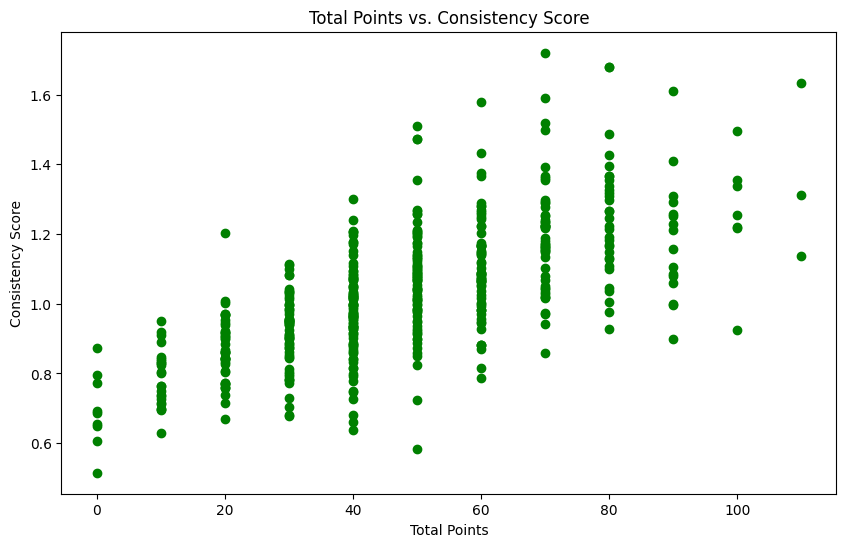

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(final_stats['total_points'], final_stats['consistency_score'], color='green')
plt.xlabel('Total Points')
plt.ylabel('Consistency Score')
plt.title('Total Points vs. Consistency Score')
plt.show()


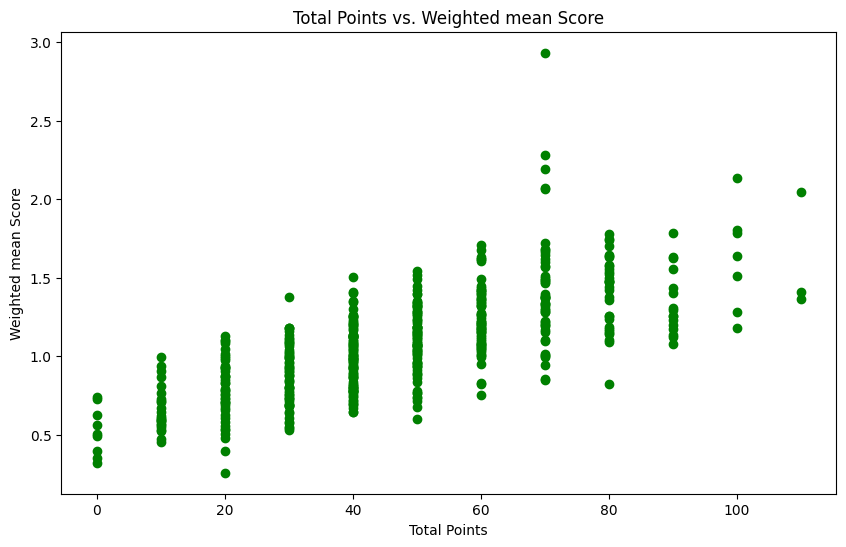

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(final_stats['total_points'], final_stats['weighted_mean_score'], color='green')
plt.xlabel('Total Points')
plt.ylabel('Weighted mean Score')
plt.title('Total Points vs. Weighted mean Score')
plt.show()


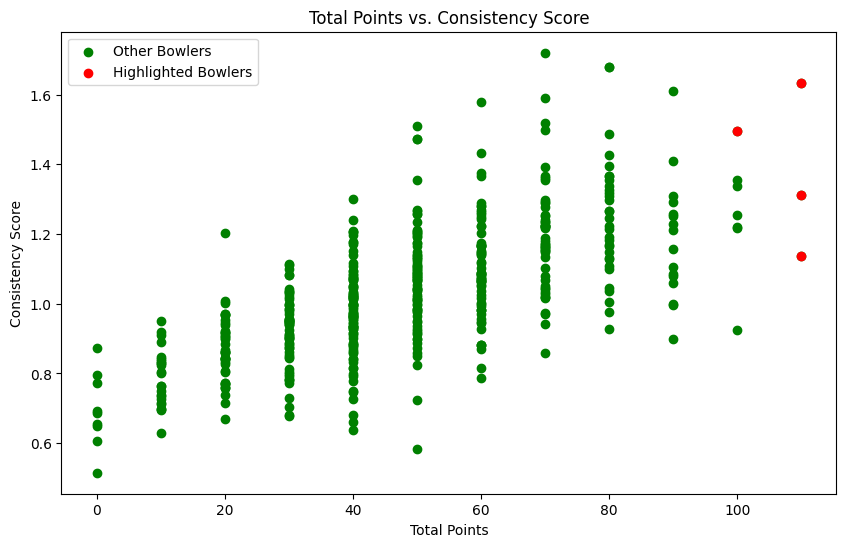

In [19]:
# Scatter plot with highlighted bowler IDs
plt.figure(figsize=(10, 6))
plt.scatter(final_stats['total_points'], final_stats['consistency_score'], color='green', label='Other Bowlers')
plt.xlabel('Total Points')
plt.ylabel('Consistency Score')
plt.title('Total Points vs. Consistency Score')

# Highlight specific bowler IDs
highlight_ids = [9455557, 5595302, 5554254, 2789604]
highlighted_bowlers = final_stats[final_stats['bowler_id'].isin(highlight_ids)]
plt.scatter(highlighted_bowlers['total_points'], highlighted_bowlers['consistency_score'], color='red', label='Highlighted Bowlers')

# Show legend
plt.legend()

plt.show()


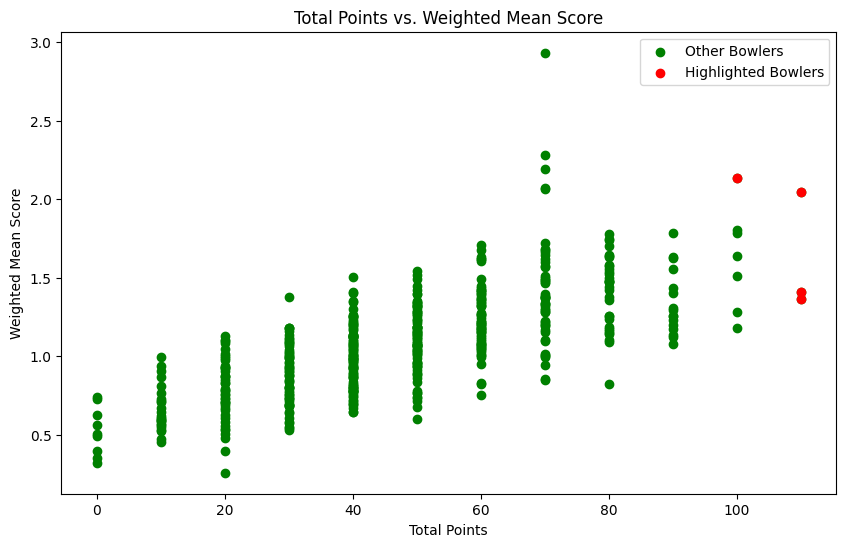

In [20]:
# Scatter plot with highlighted bowler IDs
plt.figure(figsize=(10, 6))
plt.scatter(final_stats['total_points'], final_stats['weighted_mean_score'], color='green', label='Other Bowlers')
plt.xlabel('Total Points')
plt.ylabel('Weighted Mean Score')
plt.title('Total Points vs. Weighted Mean Score')

# Highlight specific bowler IDs
highlight_ids = [9455557, 2789604, 5595302, 5554254]
highlighted_bowlers = final_stats[final_stats['bowler_id'].isin(highlight_ids)]
plt.scatter(highlighted_bowlers['total_points'], highlighted_bowlers['weighted_mean_score'], color='red', label='Highlighted Bowlers')

# Show legend
plt.legend()

plt.show()
